In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [61]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
X["Age"].fillna(X.Age.mean(), inplace=True)
X.Embarked.fillna("C",inplace=True)

In [63]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=43)


In [68]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)

In [69]:
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [70]:
model.fit(X[numeric_variables], y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=43,
           verbose=0, warm_start=False)

In [71]:
model.oob_score_

0.13569647132251794

In [73]:
y_oob = model.oob_prediction_
print ('c-stat: ', roc_auc_score(y, y_oob))

c-stat:  0.740682154688


In [74]:
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [75]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [77]:
categorical_variables = ['Sex', 'Cabin','Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [78]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [80]:
model = RandomForestRegressor(1001, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ('C-stat: ', roc_auc_score(y, model.oob_prediction_))

C-stat:  0.863904600603


In [81]:
model.feature_importances_


array([ 0.0909423 ,  0.23636341,  0.04290037,  0.02236377,  0.21814401,
        0.15480139,  0.14893754,  0.0031911 ,  0.0034448 ,  0.00616819,
        0.00451547,  0.00816006,  0.00092625,  0.00096541,  0.02707629,
        0.00024154,  0.01037598,  0.00578685,  0.01469528])

# n_jobs

In [84]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=43)
model.fit(X, y)

1 loop, best of 3: 1.73 s per loop


In [85]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 1.15 s per loop


# n_estimators

30 trees
C-stat:  0.854307140042

50 trees
C-stat:  0.861854088774

100 trees
C-stat:  0.862170986057

200 trees
C-stat:  0.862426634285

500 trees
C-stat:  0.863284121049

1000 trees
C-stat:  0.863864655567

1001 trees
C-stat:  0.863904600603



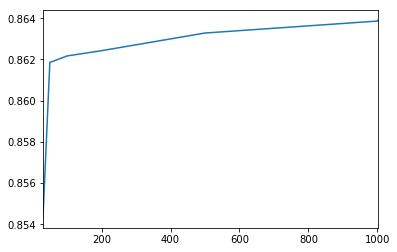

In [88]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 1001]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.863904600603

None option
C-stat:  0.863904600603

sqrt option
C-stat:  0.86326281703

log2 option
C-stat:  0.86326281703

0.9 option
C-stat:  0.863822047529

0.2 option
C-stat:  0.863097710883



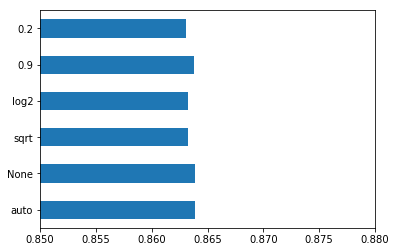

In [91]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1001, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

In [92]:
model = RandomForestRegressor(n_estimators=1001, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

C-stat:  0.8743275919


# The most precise answer is 0.8743275919